In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ws

Seja $f(x)$ uma função definida em na reta de período $L$.

Os coeficientes de Fourier de $f$ são dados por
$$ \hat{f}(n) = \frac{1}{L} \int_0^L f(x) \, e^{-2 \pi i n x / L} \, dx \quad \text{para } n \in \mathbb{Z} $$

Escrevemos
$$ f(x) \sim \sum_{n \in \mathbb{Z}} a_n \, e^{2\pi i n x / L} $$
para indicar a série de Fourier associada a $f$.

É claro que os coeficientes assim definidos são números complexos. Usando o fato de que $f$ assume apenas valores reais, podemos derivar a seguinte forma equivalente:
$$ f(x) \sim \frac{a_0}{2} + \sum_{n = 1}^{\infty} \left[ a_n \cos(2\pi k x / L) + b_n \sin(2\pi k x / L) \right] $$

onde 
$$ 
    a_n = \frac{2}{L} \int_0^L f(x) \cos(2\pi k x / L) \, dx \\
    b_n = \frac{2}{L} \int_0^L f(x) \sin(2\pi k x / L) \, dx
$$

In [2]:
PI = np.pi

def sin(x, k, phi=0): return np.sin(2*PI*(k*x + phi))

def cos(x, k, phi=0): return np.cos(2*PI*(k*x + phi))

### Senoidais interativas

In [3]:
X = np.linspace(0, 5, 200)

k_slider = ws.FloatSlider(min=0.2, max=5, description="k")

phi_slider = ws.FloatSlider(min=0, max=2, description="phi")

@ws.interact(k=k_slider, phi=phi_slider, y0=2)
def plotfun(k, phi):
    Y = sin(X, k, phi) + 2

    plt.subplots(figsize=(12, 3))
    plt.plot(X, Y, '-o')
    plt.ylim(bottom=0)
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=0.2, description='k', max=5.0, min=0.2), FloatSlider(value=0.0, descri…

### Composição de senoidais

Vamos ver como se parece uma função construída a partir da soma de algumas senoidais com frequências e fases diferentes.

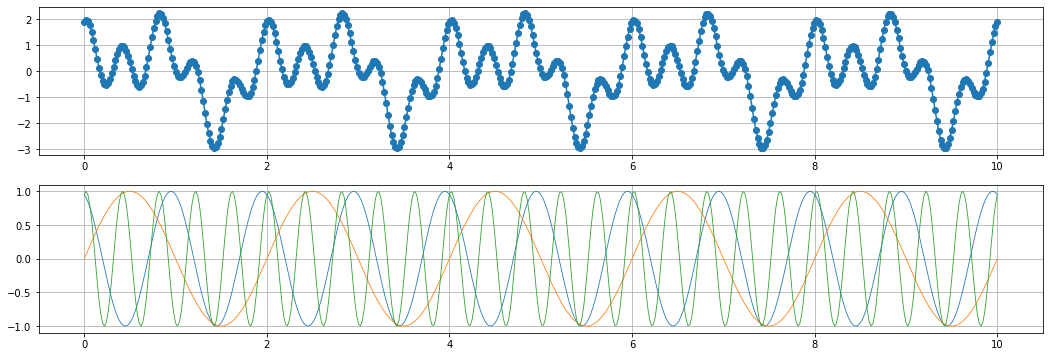

In [4]:
X = np.linspace(0, 10, 500)

freq_phase_pairs = [
    (1, 0.3),
    (0.5, 0),
    (2.5, 0.2),
]

f = lambda x: sum([sin(x, k, b) for k, b in freq_phase_pairs])

fig, axs = plt.subplots(2, 1, figsize=(18, 6))
ax = axs[0]
ax.plot(X, f(X), '-o')
ax.grid()

ax = axs[1]
for k, b in freq_phase_pairs:
    ax.plot(X, sin(X, k, b), '-', linewidth=0.8)
ax.grid()

plt.show()

### Efeito cumulativo da adição de componentes

No gráfico abaixo podemos ver o efeito cumulativo da adição de componentes senoidais.

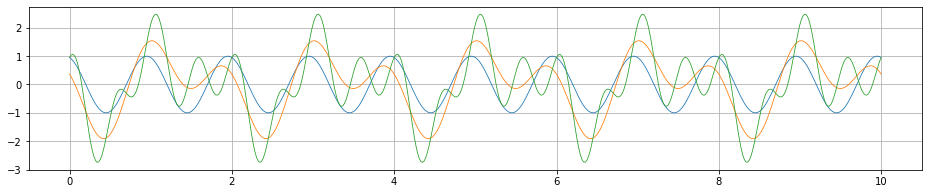

In [5]:
X = np.linspace(0, 10, 500)

freq_phase_pairs = [
    (1, 0.3),
    (0.5, 0.6),
    (2, 0.1),
]

fig, ax = plt.subplots(figsize=(16, 3))

for i, _ in enumerate(freq_phase_pairs):
    f = lambda x: sum([sin(x, k, b) for k, b in freq_phase_pairs[:i+1]])
    ax.plot(X, f(X), '-', linewidth=0.8)
ax.grid()

plt.show()

### Coeficiente de Fourier

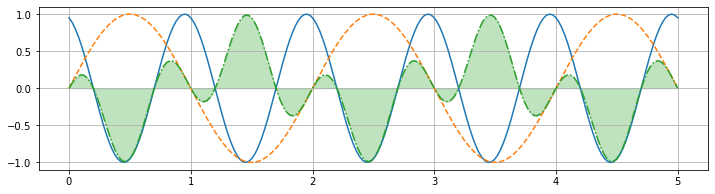

In [6]:
X = np.linspace(0, 5, 200)

f = lambda x: sin(x, 1, 0.3)

# g = lambda x: sin(x, 1, 0)
# g = lambda x: sin(x, 1, 0.55)
g = lambda x: sin(x, 0.5, 0)

h = lambda x: g(x) * f(x)

show_product = True

plt.subplots(figsize=(12, 3))
plt.plot(X, f(X), '-')
plt.plot(X, g(X), '--')

if show_product:
    plt.plot(X, h(X), '-.', color='C02')
    plt.fill_between(X, 0, h(X), color='C02', alpha=0.3)

plt.grid()
plt.show()

In [7]:
import scipy.integrate as integrate

result = integrate.quad(h, a=X[0], b=X[-1])

print(result)

(-0.20182046097084266, 1.4418468849419774e-10)


### Coeficiente de Fourier 2

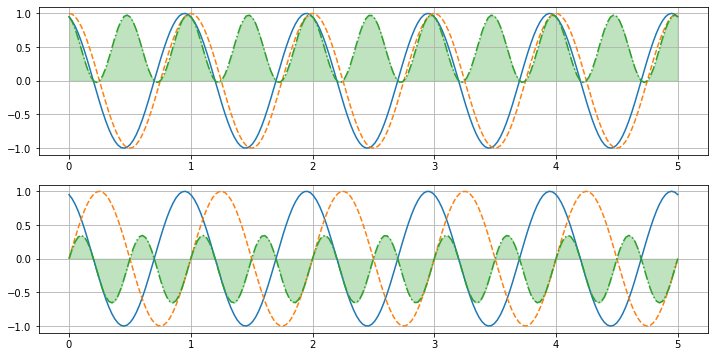

a_n = 2.3776e+00, b_n = -7.7254e-01


In [8]:
X = np.linspace(0, 5, 200)

f = lambda x: sin(x, 1, 0.3)

n = 1

show_product = True

fix, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
g = lambda x: cos(x, n)
h = lambda x: g(x) * f(x)

a_n, _ = integrate.quad(h, a=X[0], b=X[-1])

ax.plot(X, f(X), '-')
ax.plot(X, g(X), '--')

if show_product:
    ax.plot(X, h(X), '-.', color='C02')
    ax.fill_between(X, 0, h(X), color='C02', alpha=0.3)

ax.grid()

ax = axs[1]
g = lambda x: sin(x, n)
h = lambda x: g(x) * f(x)

b_n, _ = integrate.quad(h, a=X[0], b=X[-1])

ax.plot(X, f(X), '-')
ax.plot(X, g(X), '--')

if show_product:
    ax.plot(X, h(X), '-.', color='C02')
    ax.fill_between(X, 0, h(X), color='C02', alpha=0.3)

ax.grid()

plt.show()

print(f"{a_n = :.4e}, {b_n = :.4e}")

## Calculando coeficientes de Fourier

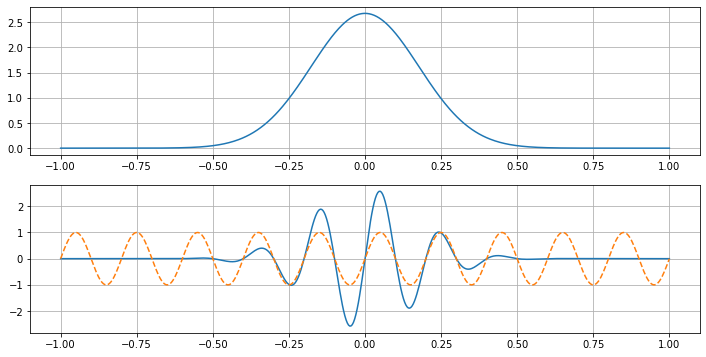

In [9]:
def f(x): return np.sin(10*PI*x)

sd = 0.25
g_eps = lambda x: np.exp(-x**2/sd**2)
norm_c = integrate.quad(g_eps, a=-sd, b=sd)[0]
g = lambda x: g_eps(x) / norm_c

X = np.linspace(-1, 1, 500)

Y = [f(x)*g(x) for x in X]

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(X, g(X), '-')
ax.grid()

ax = axs[1]
ax.plot(X, Y, '-')
ax.plot(X, f(X), '--')
ax.grid()
plt.show()

In [10]:
def fourier_coef(f, X, n):
    L = X[-1] - X[0]
    a_n = integrate.quad(lambda x: f(x)*np.sin(2*PI*n*x/L), a=X[0], b=X[-1])[0]
    b_n = integrate.quad(lambda x: f(x)*np.cos(2*PI*n*x/L), a=X[0], b=X[-1])[0]
    return a_n, b_n
        

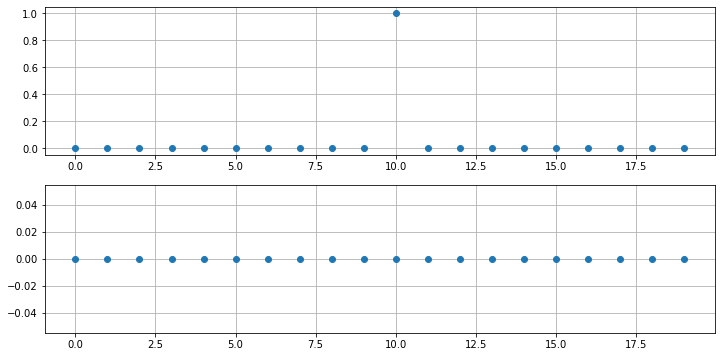

In [11]:
N = list(range(20))

FN = [fourier_coef(f, X, n) for n in N]

AN, BN = zip(*FN)

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(N, AN, 'o')
ax.grid()

ax = axs[1]
ax.plot(N, BN, 'o')
ax.grid()

plt.show()

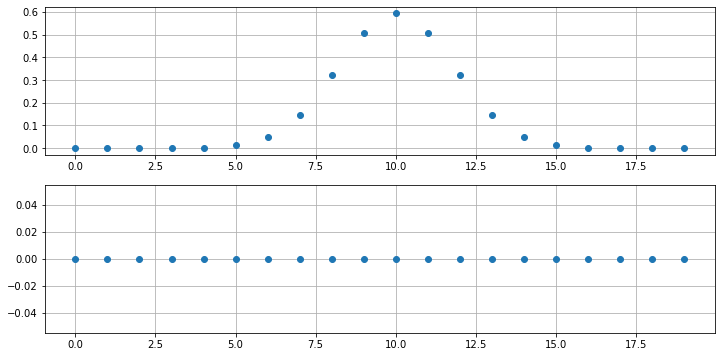

In [12]:
N = list(range(20))

h = lambda x: f(x)*g(x)

FN = [fourier_coef(h, X, n) for n in N]

AN, BN = zip(*FN)

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(N, AN, 'o')
ax.grid()

ax = axs[1]
ax.plot(N, BN, 'o')
ax.grid()

plt.show()

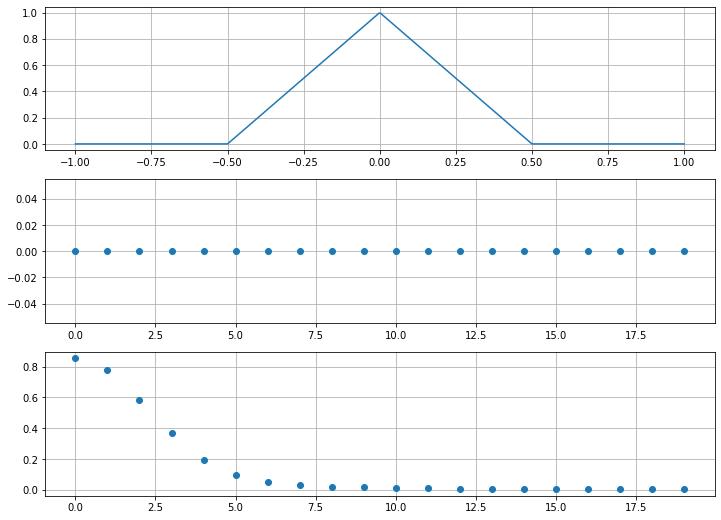

In [13]:
N = list(range(20))

# def f(x): return np.cos(2*PI*(5*x)/2 + PI*0.5)
# def f(x): return np.sin(2*PI*(5*x)/2)
# def f(x): return np.exp(-(x-0.5))

def triangle(x):
    if x < -0.5 or x > 0.5:
        return 0
    elif x < 0:
        return 2*x + 1
    else:
        return -2*x + 1
    
def bump(x):
    if not (-1 < x < 1):
        return 0
    
    return np.exp(-1/(1-x**2))

f = np.vectorize(triangle, otypes=['float'])

# f = np.vectorize(lambda x: bump(x/0.5), otypes=['float'])

h = lambda x: f(x)*g(x)

# FN = [fourier_coef(f, X, n) for n in N]
FN = [fourier_coef(h, X, n) for n in N]

AN, BN = zip(*FN)

fig, axs = plt.subplots(3, 1, figsize=(12, 9))

ax = axs[0]
ax.plot(X, f(X))
# ax.plot(X, h(X))
ax.grid()

ax = axs[1]
ax.plot(N, AN, 'o')
ax.grid()

ax = axs[2]
ax.plot(N, BN, 'o')
ax.grid()

plt.show()

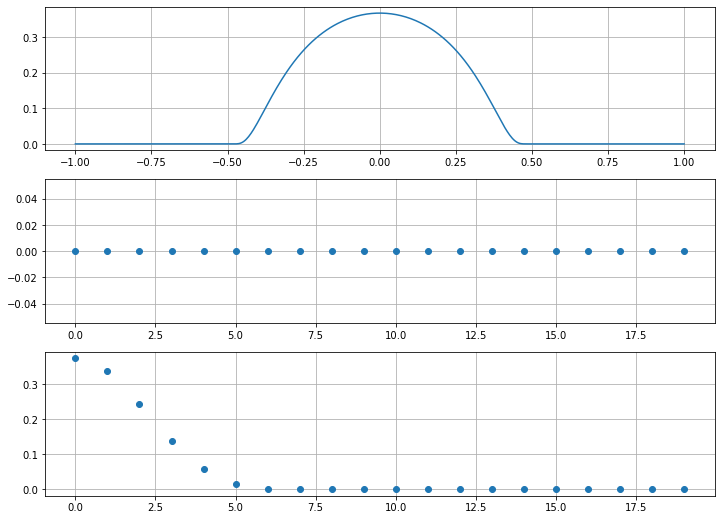

In [14]:
N = list(range(20))

# def f(x): return np.cos(2*PI*(5*x)/2 + PI*0.5)
# def f(x): return np.sin(2*PI*(5*x)/2)
# def f(x): return np.exp(-(x-0.5))

def triangle(x):
    if x < -0.5 or x > 0.5:
        return 0
    elif x < 0:
        return 2*x + 1
    else:
        return -2*x + 1
    
def bump(x):
    if not (-1 < x < 1):
        return 0
    
    return np.exp(-1/(1-x**2))

# f = np.vectorize(triangle, otypes=['float'])

f = np.vectorize(lambda x: bump(x/0.5), otypes=['float'])

h = lambda x: f(x)*g(x)

# FN = [fourier_coef(f, X, n) for n in N]
FN = [fourier_coef(h, X, n) for n in N]

AN, BN = zip(*FN)

fig, axs = plt.subplots(3, 1, figsize=(12, 9))

ax = axs[0]
ax.plot(X, f(X))
# ax.plot(X, h(X))
ax.grid()

ax = axs[1]
ax.plot(N, AN, 'o')
ax.grid()

ax = axs[2]
ax.plot(N, BN, 'o')
ax.grid()

plt.show()

### Outras funções de suporte compacto

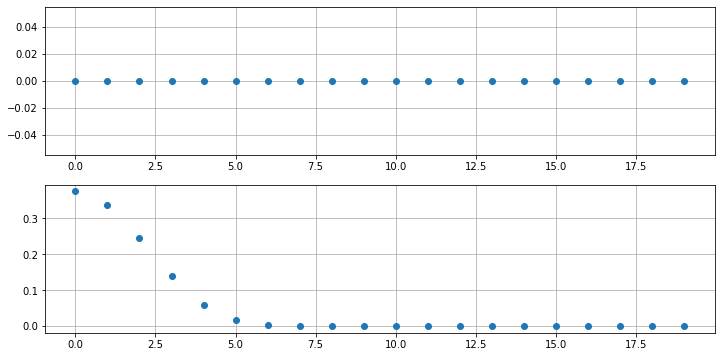

In [15]:
N = list(range(20))

h = lambda x: f(x)*g(x)

FN = [fourier_coef(h, X, n) for n in N]

AN, BN = zip(*FN)

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(N, AN, 'o')
ax.grid()

ax = axs[1]
ax.plot(N, BN, 'o')
ax.grid()

plt.show()

## Usando uma função diferente

In [16]:
def bump(x):
    if not (-1 < x < 1):
        return 0
    
    return np.exp(-1/(1-x**2))

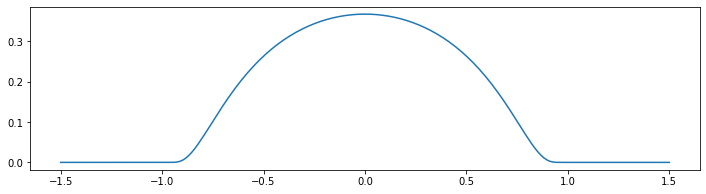

In [17]:
X = np.linspace(-1.5, 1.5, 200)

Y = [bump(x) for x in X]

plt.subplots(figsize=(12, 3))

plt.plot(X, Y, '-')
plt.show()

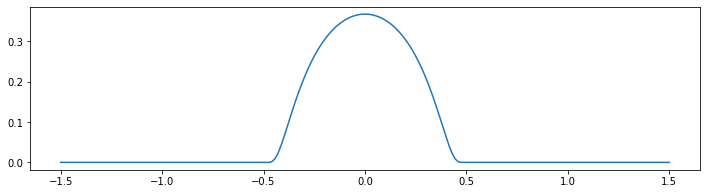

In [18]:
X = np.linspace(-1.5, 1.5, 200)

a = 0.5

Y = [bump(x/a) for x in X]

plt.subplots(figsize=(12, 3))

plt.plot(X, Y, '-')
plt.show()

#### Como eu faria uma convolução?

$$ (f * g)(x) = \int_{-\infty}^{\infty} f(y) \, g(x - y) \, dy = \int_{-\infty}^{\infty} f(x-y) \, g(y) \, dy $$

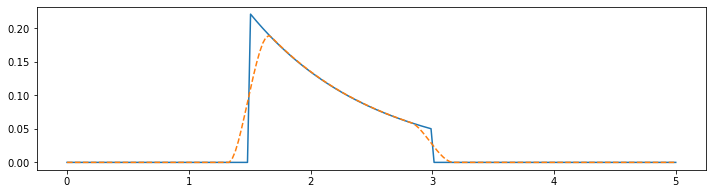

In [19]:
def f(x): return np.exp(-x) if (1.5 < x < 3) else 0

a = 0.2
g_a = lambda x: bump(x/a)
norm_c = integrate.quad(g_a, a=-1, b=1)[0]
g = lambda x: g_a(x) / norm_c

X = np.linspace(0, 5, 200)
Y = [f(x) for x in X]

def conv_f(x): 
    fg = lambda y: f(x-y) * g(y)
    return integrate.quad(fg, a=-1, b=1)[0]

Z = [conv_f(x) for x in X]

plt.subplots(figsize=(12, 3))

plt.plot(X, Y, '-')
plt.plot(X, Z, '--')

plt.show()